# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Noche, Filomeno\
_Student No._:2019-07659\
_Section_: THV-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Filomeno III A. Noche**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

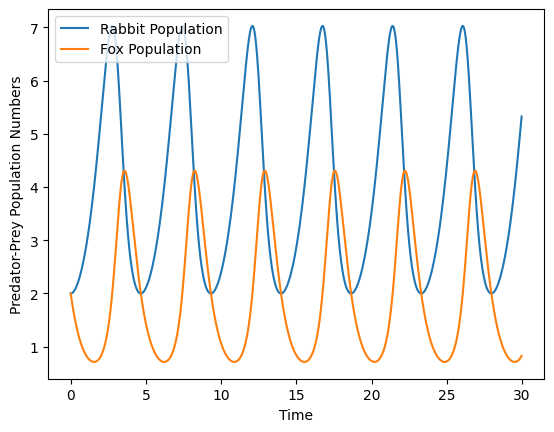

In [102]:
from math import sin
from numpy import array,arange
from pylab import plot, xlabel, ylabel, show, legend

def f(r,t): #function for the derivatives of x and y wrt t
  x = r[0]
  y = r[1]
  fx=x-0.5*x*y #derivative of x wrt t where alpha=1, beta=0.5
  fy=0.5*x*y-2*y #derivative of y wrt t where gamma=0.5, delta=2
  return array([fx,fy],float)
a=0.0 #t=0
b=30.0 #t=30
N=1000
h=(b-a)/N
#code for the fourth-order Runge-Kutta method
time=arange(a,b,h) #the x-axis of the plot
rabbit=[]
ypoints=[]
r=array([2.0,2.0],float) #initial conditions x=y=2
for t in time:
  rabbit.append(r[0])
  ypoints.append(r[1])
  k1=h*f(r,t)
  k2=h*f(r+0.5*k1,t+0.5*h)
  k3=h*f(r+0.5*k2,t+0.5*h)
  k4=h*f(r+k3,t+h)
  r+=(k1+2*k2+2*k3+k4)/6
plot(time,rabbit, label='Rabbit Population') #plot for the Rabbit Population
plot(time,ypoints, label='Fox Population') #plot for the fox population
legend()
xlabel("Time")
ylabel("Predator-Prey Population Numbers")
show()

Graph shows how the Rabbit Population (blue) and the Fox Population (orange) change depending on the population of the other over time. \
* As the rabbits increase, the foxes increase. \
* When the fox population peaks, rabbits decrease which causes the foxes to decrease as well due to lack of food. \
* When the foxes are few enough, the rabbit population recovers which continues the cycle.

This relationship is described in the Lotka-Volterra equations where:\
$\frac{dx}{dt}=\alpha x - \beta xy$ \
Represents Prey Growth where:
* $\alpha$ is the growth rate of prey and
* $\beta$ is the rate of prey being consumed by predators. \

$\frac{dy}{dt}=\gamma xy - δy$ \
Represents Predator Growth where:
* $γ$ is the rate predators increase by consuming prey and
* $δ$ is the rate predators die.

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


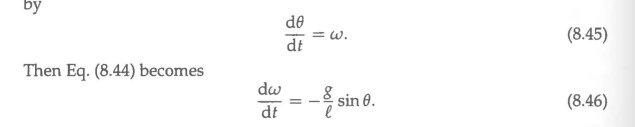

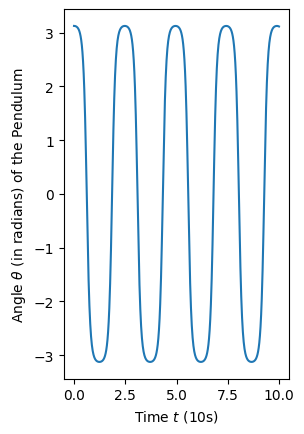

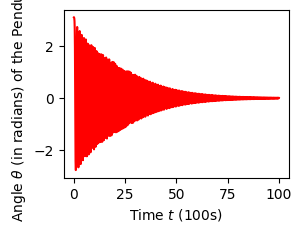

In [2]:
from math import sin,pi
from numpy import array,arange,where
from pylab import plot,subplot, xlabel, ylabel, show
g=9.81 #acceleration due to gravity
l=0.1 #length of 10cm
def f(r,t): #functions from Eq 8.45 and 8.46
  theta=r[0]
  omega=r[1]
  ftheta=omega #equ 8.45
  fomega=-(g/l)*sin(theta) #equ 8.46
  return array([ftheta,fomega],float)

a=0.0 #t=0
b=10.0 #t=10
N=1000
h=(b-a)/N

#code for the fourth-order Runge-Kutta method

tpoints=arange(a,b,h) #for the time axis
angle=[] #for the angle axis
r=array([179*pi/180,0.0],float) #angle converted to radians so it follows a periodic function. omega is set to 0.
for t in tpoints:
  angle.append(r[0])
  k1=h*f(r,t)
  k2=h*f(r+0.5*k1,t+0.5*h)
  k3=h*f(r+0.5*k2,t+0.5*h)
  k4=h*f(r+k3,t+h)
  r+=(k1+2*k2+2*k3+k4)/6
subplot(1,2,1)
plot(tpoints,angle) #plot proper
xlabel("Time $t$ (10s)")
ylabel("Angle $θ$ (in radians) of the Pendulum")
show()
#####################################################################
#This replicated code shows the angle as a function of t when b=100
a=0.0 #t=0
b=100.0 #t=100
N=1000
h=(b-a)/N
tpoints=arange(a,b,h) #for the time axis
angle2=[] #for the angle axis
r=array([179*pi/180,0.0],float) #angle converted to radians so it follows a periodic function. omega is set to 0.
for t in tpoints:
  angle2.append(r[0])
  k1=h*f(r,t)
  k2=h*f(r+0.5*k1,t+0.5*h)
  k3=h*f(r+0.5*k2,t+0.5*h)
  k4=h*f(r+k3,t+h)
  r+=(k1+2*k2+2*k3+k4)/6
subplot(2,2,1)
plot(tpoints,angle2,'r') #plot proper
xlabel("Time $t$ (100s)")
ylabel("Angle $θ$ (in radians) of the Pendulum")
show()


The first figure shows the angle θ of the pendulum oscillating over time (up to 10 seconds). Ideally, the graph's crests and troughs would equal to $±3.12413936106985\:radians$ (initial angle) and it would oscillate indefinitely as there is no air friction and the arm is massless. \

However, it has been observed that each crest and trough do not equal each other respectively over time. \

This discrepancy is more apparent in the second figure when the time interval is moved up to 100 seconds (that is, b=100) and the angle is shown to dissipate over time despite ideal conditions. The cause of this scenario is truncation error, that is, the computer's attempt to approximate 179π/180 as $θ$ approaches the crest/trough which causes the amplitude to decrease over time. \

This can be alleviated by increasing the number of steps for better accuracy.
